# Welcome to Pytorch!
After almost everyone using Keras to get good scores in the competition, I took the challenge to use the beloved Pytorch! <br>
My Previous tries were good, but they took **4 hours to run**
Now after I made changes as the great francescopochetti, my excecution time has **come down to 10 minutes** (WOHOOOO!) <br>
Have a look at the original work of Frances http://francescopochetti.com/pytorch-for-tabular-data-predicting-nyc-taxi-fares/


#### upvote if you find it useful. Sharing is the best way to learn!

Ideas to imporve:
* Get a early stopping callback
* Get learning rate scheduler
* Make Network Deeper

# Simple imports

In [1]:
%matplotlib inline
import pathlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 500)
from collections import defaultdict


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


# Pytroch imports

In [2]:
from torch.nn import init
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data
from torch.optim import lr_scheduler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from tqdm import tqdm # , # tqdm_notebook, # tnrange
from tqdm.notebook import trange as tnrange # will change this to trange later 
from tqdm.notebook import tqdm as tqdm_notebook # will change this to tqdm later
tqdm.pandas(desc='Progress')

In [3]:
import gc
gc.collect()

21

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ubiquant-market-prediction/example_sample_submission.csv
/kaggle/input/ubiquant-market-prediction/example_test.csv
/kaggle/input/ubiquant-market-prediction/train.csv
/kaggle/input/ubiquant-market-prediction/ubiquant/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/ubiquant-market-prediction/ubiquant/__init__.py
/kaggle/input/finally-a-fast-pytorch-model/trained_model.pth
/kaggle/input/finally-a-fast-pytorch-model/__results__.html
/kaggle/input/finally-a-fast-pytorch-model/submission.csv
/kaggle/input/finally-a-fast-pytorch-model/__resultx__.html
/kaggle/input/finally-a-fast-pytorch-model/__notebook__.ipynb
/kaggle/input/finally-a-fast-pytorch-model/__output__.json
/kaggle/input/finally-a-fast-pytorch-model/custom.css
/kaggle/input/finally-a-fast-pytorch-model/__results___files/__results___50_0.png
/kaggle/input/finally-a-fast-pytorch-model/__results___files/__results___42_1.png
/kaggle/input/ubiquant-market-prediction-half-precision-pickle/train.pkl


# Import dataset

In [5]:
df = pd.read_pickle('../input/ubiquant-market-prediction-half-precision-pickle/train.pkl')
df.head(2)

,investment_id,time_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,target
0,1,0,0.932617,0.113708,-0.402100,0.378418,-0.203979,-0.413574,0.965820,1.230469,0.114807,-2.013672,0.004936,0.28418,0.501953,-0.287842,-1.168945,-0.267334,-0.574219,-0.771973,1.012695,-1.230469,1.786133,-2.089844,0.325684,-0.877930,1.048828,0.131714,-0.349609,-1.813477,0.099243,-0.240967,1.604492,0.003637,-0.901855,0.221558,0.609863,-0.738770,2.097656,-0.914062,-0.293945,-0.037994,0.685547,0.0,0.414795,-0.469482,-1.085938,-0.106445,0.059448,0.483154,1.189453,0.506836,0.754395,0.317627,-0.183228,5.164062,0.677246,-0.440674,0.631348,-1.845703,0.227783,0.841309,0.667480,-0.854004,-0.17041,-0.11969,-0.504883,0.662598,1.933594,-0.812500,0.072815,-0.778809,-0.553711,-0.032776,-0.619141,-1.424805,0.148315,0.257812,0.735352,0.563965,-0.272217,1.190430,-0.101379,1.333984,0.191284,0.630859,1.010742,0.161865,0.609375,-0.219482,-0.013069,1.505859,-1.319336,0.448242,-0.635254,-0.075378,1.033203,-0.664062,0.139893,0.186279,0.593262,-0.301514,0.666504,0.713379,1.020508,0.879883,-1.096680,-0.211060,-0.117493,-0.778809,0.065979,0.229736,0.435303,1.233398,-0.865723,0.062347,0.382324,-1.31543,0.786621,0.770508,-0.871094,0.583496,0.115601,0.209595,0.325439,0.469238,0.0,-0.731445,-0.249512,-0.050568,-1.232422,-0.790527,0.493408,0.357910,-0.381592,0.176392,0.748047,-0.741699,0.089661,1.080078,1.137695,1.199219,0.030609,-0.356201,0.247803,1.395508,0.961914,0.078125,-1.163086,0.707520,0.256104,-0.026306,0.329102,0.196045,0.65332,0.069214,0.907715,-0.350586,-1.170898,0.65918,0.937500,0.482910,-0.094910,0.317383,0.126831,0.892090,-1.199219,-0.315430,0.704102,-0.017700,-0.513184,-0.362549,1.0,2.265625,0.360107,0.054474,1.639648,-1.0,0.876953,0.368164,0.991211,-1.224609,-1.208984,-0.879883,1.0,0.035156,0.693359,0.307129,0.143799,0.728027,1.220703,-0.939941,-0.106934,0.000000,-0.569336,0.187866,-0.386475,-0.452393,0.269775,-0.565430,-0.262207,-1.473633,0.0,0.428223,1.740234,0.941406,-0.729980,-0.533203,-0.983398,-0.043152,-0.225952,-0.008301,-0.447998,0.551270,-0.153076,-2.292969,0.186646,-0.443115,0.121216,0.787598,1.996094,-1.286133,-0.157227,1.019531,0.693359,0.797363,-0.192627,0.222778,0.921387,-0.171387,0.021652,1.15332,0.689941,3.251953,0.992188,-0.779785,-0.546387,-0.379150,1.896484,-0.732422,-0.113770,1.127930,-0.007927,0.122314,0.444580,0.485840,-2.302734,0.3

In [6]:
n_features = 300
features = [f'f_{i}' for i in range(n_features)]

# Setting investment id as categorical feature (just trying out!)

In [7]:
# setting as category feature
df['investment_id'] = df['investment_id'].astype('category')

# Defining some helper functions to make life easy later

In [8]:
def split_features(df):
    catf = ['investment_id']
    numf = [col for col in df.columns if col not in catf]
    
    for c in catf: 
        df[c] = df[c].astype('category').cat.as_ordered()
        df[c] = df[c].cat.codes + 1
    
    return catf, numf

In [9]:
def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)

In [10]:
df = df.loc[df['time_id']>400] # filter out old data

## make use of helper functions!

In [11]:
y = df['target']
df = df.drop(columns = ['target'], axis = 1)

In [12]:
catf, numf = split_features(df)

print(len(catf))
print(catf)

print(len(numf))
# numf

1
['investment_id']
301


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape)

(1714824, 302) (571609, 302)


In [14]:
cat_sz = [(c, df[c].max()+1) for c in catf]
print(cat_sz)

emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
print(emb_szs)

[('investment_id', 3580)]
[(3580, 50)]


# Define the Dataset by rewriting the data.Dataset module

In [15]:
class RegressionColumnarDataset(data.Dataset):
    def __init__(self, df, cats, y):
        self.dfcats = df[cats]
        self.dfconts = df.drop(cats, axis=1)
        
        self.cats = np.stack([c.values for n, c in self.dfcats.items()], axis=1).astype(np.int64)
        self.conts = np.stack([c.values for n, c in self.dfconts.items()], axis=1).astype(np.float32)
        self.y = y.values.astype(np.float32)
        
    def __len__(self): return len(self.y)

    def __getitem__(self, idx):
        return [self.cats[idx], self.conts[idx], self.y[idx]]

In [16]:
trainds = RegressionColumnarDataset(X_train, catf, y_train)
valds = RegressionColumnarDataset(X_test, catf, y_test)

In [17]:
del X_train, X_test, y_train, y_test

In [18]:
traindl = data.DataLoader(trainds, batch_size = 1024, shuffle = True, num_workers = 2, pin_memory = True)
valdl = data.DataLoader(valds, batch_size = 2048, shuffle = True, num_workers = 2, pin_memory = True)

In [19]:
n_cont = len(df.columns)-len(catf)
n_cont

301

In [20]:
del df,trainds, valds

# Training!

## The Neural Network :)

This may look complex (it does to me!),  but actually this is quite simple. Have a nice read and check it out. <br>
The model mainly uses Embedding layers for the categorical variable (investmentid) and simple dense layers otherwise

In [21]:
class MixedInputModel(nn.Module):
    def __init__(self, emb_szs, n_cont, emb_drop, out_sz, szs, drops, use_bn=True):
        super().__init__()
        
        for i,(c,s) in enumerate(emb_szs): 
            assert c > 1, f"cardinality must be >=2, got emb_szs[{i}]: ({c},{s})"
        
        self.embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
        
        for emb in self.embs: emb_init(emb)
        n_emb = sum(e.embedding_dim for e in self.embs)
        self.n_emb, self.n_cont = n_emb, n_cont
        
        # embeddings are done, now concatatenate 
        szs = [n_emb + n_cont] + szs
        self.lins = nn.ModuleList([nn.Linear(szs[i], szs[i+1]) for i in range(len(szs)-1)])
        self.bns = nn.ModuleList([nn.BatchNorm1d(sz) for sz in szs[1:]])
        
        # simple lines to make sure the weights are initialised in a kaiming distribution
        for o in self.lins: nn.init.kaiming_normal_(o.weight.data)
            
        self.outp = nn.Linear(szs[-1], out_sz) # define output layer
        nn.init.kaiming_normal_(self.outp.weight.data)

        # define dropout layers
        self.emb_drop = nn.Dropout(emb_drop)
        self.drops = nn.ModuleList([nn.Dropout(drop) for drop in drops])
        
        # define batch normalisation layers
        self.bn = nn.BatchNorm1d(n_cont)
        self.use_bn = use_bn

    def forward(self, x_cat, x_cont):
        # print('initial shape HOW TO GET')
        if self.n_emb != 0:
            x = [e(x_cat[:,i]) for i,e in enumerate(self.embs)]
            # print('embs len', len(x), 'elements like', x[:5])
            x = torch.cat(x, 1)
            # print('cat', x.shape)
            x = self.emb_drop(x)
            # print('emb drop', x.shape)
            
        # print('\n')
        if self.n_cont != 0:
            x2 = self.bn(x_cont)
            # print('bn get x2', x2.shape)
            x = torch.cat([x, x2], 1) if self.n_emb != 0 else x2
            # print('cat again', x.shape)
            
        # print('\n')
        for l,d,b in zip(self.lins, self.drops, self.bns):
            # changing order to fc - bn - relu - dropouts
            x = l(x)
            # print('linear', x.shape)
            if self.use_bn: x = b(x)
            # print('bn', x.shape)
            x = F.silu(x) # silu activation istead of the usual ReLU
            # print('silu', x.shape)
            x = d(x)
            # print('drops', x.shape)
            # print('\n')
            
        # print('\n')
        x = self.outp(x)
        # print('output', x.shape)
        
            
        return x.squeeze()

In [22]:
m = MixedInputModel(emb_szs=emb_szs, 
                    n_cont=n_cont, 
                    emb_drop=0.04, 
                    out_sz=1, 
                    szs=[400, 650, 950, 650, 400, 128, 8], 
                    drops=[0.1, 0.1, 0.1, 0.3, 0.1, 0.01, 0.0001]).to(device)

### check if the model looks good

In [23]:
m

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(3580, 50)
  )
  (lins): ModuleList(
    (0): Linear(in_features=351, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=650, bias=True)
    (2): Linear(in_features=650, out_features=950, bias=True)
    (3): Linear(in_features=950, out_features=650, bias=True)
    (4): Linear(in_features=650, out_features=400, bias=True)
    (5): Linear(in_features=400, out_features=128, bias=True)
    (6): Linear(in_features=128, out_features=8, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(650, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(950, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(650, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [24]:
# get single elements, and train them on the CPU iteself
for cat, cont, y in traindl:
    print(cat.device, cont.device, y.device)
    
    break

cpu cpu cpu


# better way to see the network
uncomment the print statements in the network, this will the output <br>
It helps to nicely see what is going on. **However, I will try my best to convert this to a nn.Sequential type for east understanding**

In [25]:
# m(cat, cont)

# initial shape HOW TO GET?? ( will have to see better)
# embs len 1 elements like [tensor([[-6.8909e-03,  3.2817e-02, -2.0786e-02,  ...,  3.0483e-02,
#          -4.5606e-04, -5.0471e-04],
#         [-5.0236e-03, -2.1645e-02, -4.6295e-05,  ...,  8.9745e-03,
#           2.3533e-02,  3.0192e-02],
#         [ 2.5954e-02,  2.4555e-03, -2.6891e-02,  ..., -1.2833e-02,
#           1.6570e-02, -3.5575e-03],
#         ...,
#         [ 1.9291e-02, -2.6346e-02,  4.3786e-03,  ...,  2.5476e-02,
#          -6.8894e-03,  3.7377e-02],
#         [-1.0805e-02, -1.9892e-02, -3.4380e-02,  ..., -3.1371e-02,
#           5.2091e-03,  6.5443e-03],
#         [ 3.8637e-02,  4.4848e-03, -2.4427e-02,  ..., -1.6600e-02,
#           9.7741e-03, -2.1790e-05]], grad_fn=<EmbeddingBackward>)]
# cat torch.Size([1024, 50])
# emb drop torch.Size([1024, 50])


# bn get x2 torch.Size([1024, 301])
# cat again torch.Size([1024, 351])


# linear torch.Size([1024, 400])
# bn torch.Size([1024, 400])
# silu torch.Size([1024, 400])
# drops torch.Size([1024, 400])


# linear torch.Size([1024, 500])
# bn torch.Size([1024, 500])
# silu torch.Size([1024, 500])
# drops torch.Size([1024, 500])


# linear torch.Size([1024, 750])
# bn torch.Size([1024, 750])
# silu torch.Size([1024, 750])
# drops torch.Size([1024, 750])


# linear torch.Size([1024, 500])
# bn torch.Size([1024, 500])
# silu torch.Size([1024, 500])
# drops torch.Size([1024, 500])


# linear torch.Size([1024, 400])
# bn torch.Size([1024, 400])
# silu torch.Size([1024, 400])
# drops torch.Size([1024, 400])


# linear torch.Size([1024, 128])
# bn torch.Size([1024, 128])
# silu torch.Size([1024, 128])
# drops torch.Size([1024, 128])


# linear torch.Size([1024, 8])
# bn torch.Size([1024, 8])
# silu torch.Size([1024, 8])
# drops torch.Size([1024, 8])




# output torch.Size([1024, 1])
# tensor([ 0.1282,  0.3186,  0.1614,  ..., -0.1414, -0.0461,  0.1904],
#        grad_fn=<SqueezeBackward0>)

# overfit on one batch
This is an incredibly important step to make sure that the model 'works'. Highly recommended by a lot of other experts, and I am really happy

In [26]:
# compile the neural net
network = MixedInputModel(emb_szs=emb_szs, 
                    n_cont=n_cont, 
                    emb_drop=0.04, 
                    out_sz=1, 
                    szs=[64, 128, 256, 512, 256, 128, 8], 
                    drops=[0.1, 0.1, 0.1, 0.3, 0.1, 0.01, 0.0001])

optimizer = optim.Adam(network.parameters(), lr=1e-2)

total_loss = []

for i in range(101):
    # loss
    loss = F.mse_loss(network(cat, cont), y)
    total_loss.append(loss)
    if (i%10 == 0):
        print("Step", i," loss:", loss.item())

    optimizer.zero_grad()
    
    # backprop
    loss.backward()  # update gradients
    optimizer.step() # update weights using gradients to minimize loss

Step 0  loss: 1.3162490129470825
Step 10  loss: 0.6569802761077881
Step 20  loss: 0.21402789652347565
Step 30  loss: 0.10802140831947327
Step 40  loss: 0.08223224431276321
Step 50  loss: 0.06370559334754944
Step 60  loss: 0.05220615863800049
Step 70  loss: 0.04071044921875
Step 80  loss: 0.0483657643198967
Step 90  loss: 0.03152267634868622
Step 100  loss: 0.024994442239403725


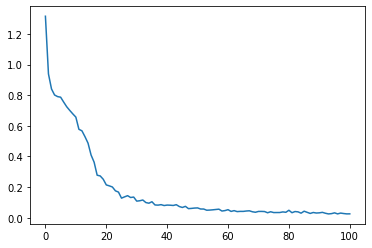

In [27]:
plt.plot(total_loss)

# Looks like working well!

# Fitting loop

In [28]:
def fit(model, train_dl, val_dl, loss_fn, opt, epochs = 3):
    num_batch = len(train_dl)
    for epoch in tnrange(epochs):   
        
        model.train()
        y_true_train = list()
        y_pred_train = list()
        total_loss_train = 0          
        
        t = tqdm_notebook(iter(train_dl), leave=False, total = num_batch)
        
        for cat, cont, y in t:
            cat = cat.cuda()
            cont = cont.cuda()
            y = y.cuda()
            
            t.set_description(f'Epoch {epoch}')
            
            opt.zero_grad()
            pred = model(cat, cont)
            loss = loss_fn(pred, y)
            loss.backward()
            lr[epoch].append(opt.param_groups[0]['lr'])
            tloss[epoch].append(loss.item())
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 4.0) # gradient clipping
            
            opt.step()
            
            
            t.set_postfix(loss=loss.item())
            
            y_true_train += list(y.cpu().data.numpy())
            y_pred_train += list(pred.cpu().data.numpy())
            total_loss_train += loss.item()
            
        train_loss = total_loss_train/len(train_dl)
        
        if val_dl:
            model.eval()
            y_true_val = list()
            y_pred_val = list()
            total_loss_val = 0
            
            for cat, cont, y in tqdm_notebook(val_dl, leave=False):
                cat = cat.cuda()
                cont = cont.cuda()
                y = y.cuda()
                
                pred = model(cat, cont)
                loss = loss_fn(pred, y)
                
                y_true_val += list(y.cpu().data.numpy())
                y_pred_val += list(pred.cpu().data.numpy())
                total_loss_val += loss.item()
            
                vloss[epoch].append(loss.item())
                
            valloss = total_loss_val/len(valdl)
    
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f}  | val_loss: {valloss:.4f} ')
        else:
            print(f'Epoch {epoch}: train_loss: {train_loss:.4f} ')
    
    return lr, tloss, vloss

# Loop through training
- I would love to implement **Callbacks** in my later models. Feel free to add in the comments any tips you have!

In [29]:
opt = optim.Adam(m.parameters(), 1e-6)
num_epochs = 8

lr = defaultdict(list)
tloss = defaultdict(list)
vloss = defaultdict(list)

In [30]:
lr, tloss, vloss = fit(model=m, train_dl=traindl, val_dl=valdl, loss_fn=F.mse_loss, opt=opt, epochs=num_epochs)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 0: train_loss: 1.5728  | val_loss: 0.9459 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 1: train_loss: 1.0180  | val_loss: 0.8958 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 2: train_loss: 0.9472  | val_loss: 0.8762 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 3: train_loss: 0.9156  | val_loss: 0.8651 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 4: train_loss: 0.8978  | val_loss: 0.8547 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 5: train_loss: 0.8866  | val_loss: 0.8526 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 6: train_loss: 0.8784  | val_loss: 0.8498 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.8728  | val_loss: 0.8473 


## Plot the results

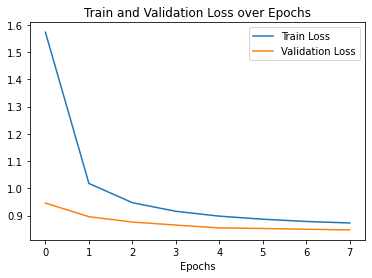

In [31]:
t = [np.mean(tloss[el]) for el in tloss]
v = [np.mean(vloss[el]) for el in vloss]
p = pd.DataFrame({'Train Loss': t, 'Validation Loss': v, 'Epochs': range(num_epochs)})

_ = p.plot(x='Epochs', y=['Train Loss', 'Validation Loss'], 
           title='Train and Validation Loss over Epochs')

In [32]:
# lr

# Train some more with lower lr

In [33]:
opt = optim.Adam(m.parameters(), 5e-12)
num_epochs = 8

lr2 = defaultdict(list)
tloss2 = defaultdict(list)
vloss2 = defaultdict(list)

In [34]:
lr2, tloss2, vloss2 = fit(model=m, train_dl=traindl, val_dl=valdl, loss_fn=F.mse_loss, opt=opt, epochs=num_epochs)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 0: train_loss: 0.8708  | val_loss: 0.8466 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 1: train_loss: 0.8698  | val_loss: 0.8483 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 2: train_loss: 0.8708  | val_loss: 0.8473 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 3: train_loss: 0.8703  | val_loss: 0.8478 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 4: train_loss: 0.8710  | val_loss: 0.8463 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 5: train_loss: 0.8705  | val_loss: 0.8470 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 6: train_loss: 0.8699  | val_loss: 0.8503 


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.8708  | val_loss: 0.8460 


In [35]:
# t2 = [np.mean(tloss2[el]) for el in tloss2]
# v2 = [np.mean(vloss2[el]) for el in vloss2]
# p2 = pd.DataFrame({'Train Loss': t2, 'Validation Loss': v2, 'Epochs': range(num_epochs)})

# _ = p2.plot(x='Epochs', y=['Train Loss', 'Validation Loss'], 
#            title='Train and Validation Loss over Epochs')

In [36]:
# opt = optim.Adam(m.parameters(), 5e-12)
# num_epochs = 5

# lr3 = defaultdict(list)
# tloss3 = defaultdict(list)
# vloss3 = defaultdict(list)

In [37]:
# lr3, tloss3, vloss3 = fit(model=m, train_dl=traindl, val_dl=valdl, loss_fn=F.mse_loss, opt=opt, epochs=num_epochs)

In [38]:
# t3 = [np.mean(tloss3[el]) for el in tloss3]
# v3 = [np.mean(vloss3[el]) for el in vloss3]
# p3 = pd.DataFrame({'Train Loss': t3, 'Validation Loss': v3, 'Epochs': range(num_epochs)})

# _ = p.plot(x='Epochs', y=['Train Loss', 'Validation Loss'], 
#            title='Train and Validation Loss over Epochs')

# Save the model

In [39]:
torch.save(m.state_dict(), 'trained_model.pth')

# Make submissions

In [40]:
torch.cuda.empty_cache() # just to clear some GPU cache memory
gc.collect()

2512

In [41]:
cols_order = ['investment_id' , 'time_id'] + features

In [42]:
def predict_for_test_data(test_data):
    catf, numf = split_features(test_df)
    testds = RegressionColumnarDataset(test_df, catf, pd.Series([1 for i in range(test_df.shape[0])])) # using 1 as y value just for putting something
    testdl = data.DataLoader(testds, batch_size = 1, shuffle = False, num_workers = 2, pin_memory = True)
    sub = []
    
    for cat_test, cont_test, _ in testdl:
        cat_test = cat_test.cuda()
        cont_test = cont_test.cuda()
        pred = m(cat_test, cont_test)
        print(pred)
        sub.append(pred)
    
        
    submission_values = [float(i.detach()) for i in sub]
    return submission_values

# Use the submission API to make predictions

In [43]:
import ubiquant
env = ubiquant.make_env()   # initialize the environment
iter_test = env.iter_test()    # an iterator which loops over the test set and sample submission

for (test_df, sample_prediction_df) in iter_test:
    
    print("test_df as loaded by the API")
    display(test_df.head(), test_df.shape)
    
    # here you need to modify test_df to match the training data
    test_df['time_id'] = test_df.row_id.str.split("_", expand=True)[0].astype("int16") #re-create time_id
    test_df = test_df[cols_order]  
    print("test_df after selecting/creating the features the model was trained with")
    display(test_df.head(), test_df.shape)
    
    # Call our function to make predictions
    predictions = predict_for_test_data(test_df)
    sample_prediction_df['target'] = predictions  # make your predictions here
    env.predict(sample_prediction_df)   # register your predictions
    print('submission made for this data')
    display(sample_prediction_df)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
test_df as loaded by the API


,row_id,investment_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,1220_1,1,0.874944,0.457875,0.962572,0.372061,0.004509,0.971304,0.097477,0.246080,0.481052,0.951130,0.968358,0.699345,0.739139,0.066587,0.808991,0.291094,0.410428,0.415464,0.475559,0.463030,0.162172,0.764135,0.988812,0.620314,0.915356,0.810174,0.793990,0.276981,0.777230,0.806242,0.094767,0.254653,0.065229,0.172443,0.429970,0.375311,0.235271,0.979103,0.739211,0.946839,0.328391,0.552147,0.291854,0.475741,0.786556,0.898680,0.115453,0.800245,0.804779,0.185797,0.230276,0.893254,0.318648,0.213987,0.186194,0.681819,0.393373,0.480479,0.473462,0.605556,0.723612,0.774659,0.326204,0.988071,0.697630,0.561397,0.748171,0.08727,0.317911,0.551137,0.733891,0.685182,0.721296,0.840730,0.990324,0.036338,0.453641,0.663457,0.109746,0.978097,0.785883,0.085453,0.101547,0.088554,0.773017,0.671386,0.260844,0.138067,0.209517,0.43256,0.543269,0.710578,0.513228,0.616471,0.400029,0.577039,0.800661,0.340733,0.522114,0.10964,0.915578,0.654280,0.103689,0.485371,0.531522,0.903273,0.265315,0.777290,0.299357,0.813668,0.616994,0.852711,0.652874,0.670269,0.599262,0.955137,0.576315,0.647672,0.965780,0.721828,0.643987,0.688608,0.148123,0.654623,0.400646,0.550776,0.927801,0.351822,0.550095,0.548258,0.565763,0.886405,0.445483,0.635064,0.228078,0.999351,0.132959,0.719205,0.079829,0.896854,0.170177,0.462065,0.069810,0.612618,0.501901,0.275765,0.452534,0.830298,0.097434,0.448382,0.138786,0.306385,0.176685,0.888951,0.296462,0.691869,0.123614,0.048984,0.965639,0.619477,0.144715,0.064928,0.641233,0.089973,0.385225,0.071957,0.437211,0.368989,0.688976,0.150254,0.993027,0.099046,0.892578,0.030713,0.241537,0.794321,0.587304,0.289077,0.154698,0.786947,0.821293,0.122905,0.163158,0.304153,0.246596,0.070908,0.095635,0.554278,0.319731,0.474685,0.850515,0.151222,0.841399,0.00989,0.074472,0.966512,0.273875,0.687070,0.035826,0.525475,0.321969,0.594598,0.079995,0.575756,0.207780,0.455963,0.933001,0.145935,0.660078,0.173596,0.654387,0.470070,0.744501,0.721583,0.336405,0.632004,0.901299,0.448609,0.686336,0.276582,0.495469,0.397506,0.671769,0.385539,0.453976,0.037179,0.758213,0.461456,0.774596,0.391214,0.803420,0.562853,0.162382,0.506769,0.794830,0.268479,0.748373,0.044955,0.867946,0.813450,0.816583,0.842692,0.204182,0.790365,0.051641,0.718111,0.299606,0.082191,0.851497,0.690467,0.774980,0.306792,0.317957,0.63

(2, 302)

test_df after selecting/creating the features the model was trained with


,investment_id,time_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,1,1220,0.874944,0.457875,0.962572,0.372061,0.004509,0.971304,0.097477,0.246080,0.481052,0.951130,0.968358,0.699345,0.739139,0.066587,0.808991,0.291094,0.410428,0.415464,0.475559,0.463030,0.162172,0.764135,0.988812,0.620314,0.915356,0.810174,0.793990,0.276981,0.777230,0.806242,0.094767,0.254653,0.065229,0.172443,0.429970,0.375311,0.235271,0.979103,0.739211,0.946839,0.328391,0.552147,0.291854,0.475741,0.786556,0.898680,0.115453,0.800245,0.804779,0.185797,0.230276,0.893254,0.318648,0.213987,0.186194,0.681819,0.393373,0.480479,0.473462,0.605556,0.723612,0.774659,0.326204,0.988071,0.697630,0.561397,0.748171,0.08727,0.317911,0.551137,0.733891,0.685182,0.721296,0.840730,0.990324,0.036338,0.453641,0.663457,0.109746,0.978097,0.785883,0.085453,0.101547,0.088554,0.773017,0.671386,0.260844,0.138067,0.209517,0.43256,0.543269,0.710578,0.513228,0.616471,0.400029,0.577039,0.800661,0.340733,0.522114,0.10964,0.915578,0.654280,0.103689,0.485371,0.531522,0.903273,0.265315,0.777290,0.299357,0.813668,0.616994,0.852711,0.652874,0.670269,0.599262,0.955137,0.576315,0.647672,0.965780,0.721828,0.643987,0.688608,0.148123,0.654623,0.400646,0.550776,0.927801,0.351822,0.550095,0.548258,0.565763,0.886405,0.445483,0.635064,0.228078,0.999351,0.132959,0.719205,0.079829,0.896854,0.170177,0.462065,0.069810,0.612618,0.501901,0.275765,0.452534,0.830298,0.097434,0.448382,0.138786,0.306385,0.176685,0.888951,0.296462,0.691869,0.123614,0.048984,0.965639,0.619477,0.144715,0.064928,0.641233,0.089973,0.385225,0.071957,0.437211,0.368989,0.688976,0.150254,0.993027,0.099046,0.892578,0.030713,0.241537,0.794321,0.587304,0.289077,0.154698,0.786947,0.821293,0.122905,0.163158,0.304153,0.246596,0.070908,0.095635,0.554278,0.319731,0.474685,0.850515,0.151222,0.841399,0.00989,0.074472,0.966512,0.273875,0.687070,0.035826,0.525475,0.321969,0.594598,0.079995,0.575756,0.207780,0.455963,0.933001,0.145935,0.660078,0.173596,0.654387,0.470070,0.744501,0.721583,0.336405,0.632004,0.901299,0.448609,0.686336,0.276582,0.495469,0.397506,0.671769,0.385539,0.453976,0.037179,0.758213,0.461456,0.774596,0.391214,0.803420,0.562853,0.162382,0.506769,0.794830,0.268479,0.748373,0.044955,0.867946,0.813450,0.816583,0.842692,0.204182,0.790365,0.051641,0.718111,0.299606,0.082191,0.851497,0.690467,0.774980,0.306792,0.317957,0.632

(2, 302)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


tensor(0.3262, device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor(0.9127, device='cuda:0', grad_fn=<SqueezeBackward0>)
submission made for this data


,row_id,target
0,1220_1,0.326238
1,1220_2,0.912677


test_df as loaded by the API


,row_id,investment_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,1221_0,0,0.175070,0.918464,0.044379,0.505868,0.037160,0.169001,0.211365,0.791252,0.739270,0.716251,0.395200,0.541030,0.933998,0.573351,0.849435,0.864232,0.713558,0.943668,0.271508,0.307234,0.331061,0.907405,0.173487,0.468120,0.371292,0.742160,0.367011,0.401412,0.093199,0.124326,0.258757,0.189615,0.296705,0.106573,0.527337,0.969791,0.688373,0.837134,0.726393,0.615015,0.646067,0.824383,0.713499,0.810384,0.247787,0.201922,0.651404,0.649859,0.974864,0.147858,0.673822,0.032087,0.913205,0.116901,0.958660,0.573235,0.907901,0.449704,0.838943,0.724182,0.642036,0.925969,0.561617,0.254233,0.053846,0.484396,0.371277,0.556199,0.699103,0.242123,0.563563,0.561031,0.375473,0.075126,0.680565,0.450250,0.252910,0.561373,0.357813,0.181630,0.570863,0.397596,0.810287,0.762601,0.426870,0.459234,0.804732,0.980578,0.602645,0.503345,0.900728,0.926586,0.137829,0.786825,0.624012,0.295226,0.098282,0.164054,0.330215,0.463152,0.651269,0.194205,0.101522,0.130218,0.738351,0.843158,0.470606,0.270672,0.453131,0.265281,0.827787,0.289531,0.995442,0.572510,0.797331,0.523912,0.525839,0.424539,0.663265,0.216903,0.675285,0.143207,0.419976,0.994607,0.094646,0.674384,0.251875,0.524599,0.998205,0.167782,0.691998,0.579204,0.681346,0.015986,0.228002,0.689566,0.633398,0.167923,0.407675,0.436881,0.227816,0.424478,0.384666,0.542953,0.681949,0.987851,0.898403,0.666200,0.715937,0.459460,0.752568,0.571354,0.149191,0.531775,0.679540,0.939700,0.917867,0.598337,0.297908,0.903345,0.622618,0.914378,0.610801,0.253423,0.798674,0.410668,0.095864,0.690391,0.357999,0.162343,0.017357,0.032159,0.310956,0.582490,0.930457,0.276244,0.037520,0.175832,0.016053,0.754072,0.472121,0.345370,0.380543,0.111594,0.142693,0.694863,0.642411,0.993022,0.858693,0.817972,0.402442,0.250017,0.336858,0.697542,0.229117,0.468357,0.612025,0.368334,0.557258,0.435097,0.639134,0.266842,0.932287,0.480522,0.794831,0.814180,0.323100,0.743717,0.602575,0.089587,0.466770,0.209266,0.198406,0.777109,0.401075,0.055186,0.614584,0.502547,0.856088,0.883401,0.960521,0.888387,0.206417,0.365655,0.875711,0.354252,0.377858,0.282718,0.674139,0.256629,0.797542,0.594621,0.734312,0.993158,0.271205,0.899058,0.628644,0.214884,0.867957,0.117706,0.356529,0.104547,0.138870,0.702098,0.632508,0.943359,0.941630,0.214162,0.875826,0.298466,0.314079,0.863828,0.288734,

(3, 302)

test_df after selecting/creating the features the model was trained with


,investment_id,time_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0,1221,0.175070,0.918464,0.044379,0.505868,0.037160,0.169001,0.211365,0.791252,0.739270,0.716251,0.395200,0.541030,0.933998,0.573351,0.849435,0.864232,0.713558,0.943668,0.271508,0.307234,0.331061,0.907405,0.173487,0.468120,0.371292,0.742160,0.367011,0.401412,0.093199,0.124326,0.258757,0.189615,0.296705,0.106573,0.527337,0.969791,0.688373,0.837134,0.726393,0.615015,0.646067,0.824383,0.713499,0.810384,0.247787,0.201922,0.651404,0.649859,0.974864,0.147858,0.673822,0.032087,0.913205,0.116901,0.958660,0.573235,0.907901,0.449704,0.838943,0.724182,0.642036,0.925969,0.561617,0.254233,0.053846,0.484396,0.371277,0.556199,0.699103,0.242123,0.563563,0.561031,0.375473,0.075126,0.680565,0.450250,0.252910,0.561373,0.357813,0.181630,0.570863,0.397596,0.810287,0.762601,0.426870,0.459234,0.804732,0.980578,0.602645,0.503345,0.900728,0.926586,0.137829,0.786825,0.624012,0.295226,0.098282,0.164054,0.330215,0.463152,0.651269,0.194205,0.101522,0.130218,0.738351,0.843158,0.470606,0.270672,0.453131,0.265281,0.827787,0.289531,0.995442,0.572510,0.797331,0.523912,0.525839,0.424539,0.663265,0.216903,0.675285,0.143207,0.419976,0.994607,0.094646,0.674384,0.251875,0.524599,0.998205,0.167782,0.691998,0.579204,0.681346,0.015986,0.228002,0.689566,0.633398,0.167923,0.407675,0.436881,0.227816,0.424478,0.384666,0.542953,0.681949,0.987851,0.898403,0.666200,0.715937,0.459460,0.752568,0.571354,0.149191,0.531775,0.679540,0.939700,0.917867,0.598337,0.297908,0.903345,0.622618,0.914378,0.610801,0.253423,0.798674,0.410668,0.095864,0.690391,0.357999,0.162343,0.017357,0.032159,0.310956,0.582490,0.930457,0.276244,0.037520,0.175832,0.016053,0.754072,0.472121,0.345370,0.380543,0.111594,0.142693,0.694863,0.642411,0.993022,0.858693,0.817972,0.402442,0.250017,0.336858,0.697542,0.229117,0.468357,0.612025,0.368334,0.557258,0.435097,0.639134,0.266842,0.932287,0.480522,0.794831,0.814180,0.323100,0.743717,0.602575,0.089587,0.466770,0.209266,0.198406,0.777109,0.401075,0.055186,0.614584,0.502547,0.856088,0.883401,0.960521,0.888387,0.206417,0.365655,0.875711,0.354252,0.377858,0.282718,0.674139,0.256629,0.797542,0.594621,0.734312,0.993158,0.271205,0.899058,0.628644,0.214884,0.867957,0.117706,0.356529,0.104547,0.138870,0.702098,0.632508,0.943359,0.941630,0.214162,0.875826,0.298466,0.314079,0.863828,0.288734,0

(3, 302)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


tensor(-0.4087, device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor(0.5511, device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor(0.4674, device='cuda:0', grad_fn=<SqueezeBackward0>)
submission made for this data


,row_id,target
0,1221_0,-0.408717
1,1221_1,0.551142
2,1221_2,0.467431


test_df as loaded by the API


,row_id,investment_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,1222_0,0,0.678116,0.158996,0.058148,0.253677,0.984982,0.323493,0.307990,0.683907,0.161220,0.194053,0.317964,0.759397,0.539069,0.182522,0.266074,0.947120,0.241618,0.765020,0.389480,0.902037,0.802491,0.507915,0.654989,0.657131,0.759706,0.270986,0.992595,0.721143,0.236869,0.417416,0.118634,0.303026,0.686876,0.412993,0.846831,0.047700,0.195398,0.863678,0.258715,0.553697,0.553079,0.040926,0.565159,0.464384,0.100581,0.594798,0.057880,0.209318,0.034367,0.461897,0.585887,0.770676,0.748150,0.288055,0.481202,0.987414,0.811071,0.098739,0.982814,0.480057,0.364901,0.414317,0.899217,0.352013,0.282871,0.944267,0.739449,0.393933,0.096705,0.404504,0.647923,0.807942,0.255130,0.573717,0.203621,0.006127,0.733428,0.871812,0.754612,0.281410,0.933492,0.717852,0.352014,0.152059,0.855714,0.252483,0.425184,0.847724,0.899399,0.498663,0.790001,0.576214,0.430735,0.509339,0.531670,0.134144,0.889756,0.446433,0.106798,0.678259,0.042105,0.224082,0.298869,0.016813,0.820803,0.127830,0.493728,0.136318,0.638651,0.082700,0.931591,0.391807,0.639677,0.746356,0.388019,0.501647,0.184366,0.253157,0.208092,0.320815,0.181435,0.757931,0.294755,0.482720,0.641268,0.753698,0.483406,0.056804,0.748482,0.128139,0.891672,0.172235,0.902301,0.407462,0.631428,0.559771,0.883543,0.697017,0.788464,0.473074,0.308334,0.234584,0.487170,0.891131,0.411065,0.993215,0.167063,0.379003,0.274438,0.289720,0.099031,0.751663,0.200928,0.340765,0.826637,0.125043,0.512181,0.655063,0.605700,0.645227,0.775993,0.777466,0.032984,0.773897,0.385322,0.275013,0.036438,0.177429,0.791186,0.021855,0.010131,0.606451,0.443362,0.312299,0.018519,0.633909,0.446273,0.534339,0.365269,0.515059,0.321396,0.080716,0.013423,0.330829,0.079811,0.194633,0.639951,0.827911,0.475518,0.249963,0.050864,0.902783,0.651844,0.119864,0.224126,0.751098,0.729622,0.982486,0.643057,0.109483,0.994784,0.720099,0.265190,0.397278,0.746035,0.351110,0.773386,0.034385,0.381999,0.841211,0.244295,0.778133,0.816299,0.147916,0.873189,0.682841,0.626665,0.037701,0.777802,0.384948,0.134895,0.172500,0.871473,0.197605,0.254214,0.514788,0.386392,0.850877,0.762247,0.732768,0.390587,0.975733,0.542207,0.948149,0.965685,0.116088,0.331523,0.344695,0.059852,0.489407,0.499119,0.651348,0.257002,0.815368,0.161756,0.906882,0.640112,0.357973,0.110129,0.766715,0.061411,0.945876,0.328364,

(3, 302)

test_df after selecting/creating the features the model was trained with


,investment_id,time_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0,1222,0.678116,0.158996,0.058148,0.253677,0.984982,0.323493,0.307990,0.683907,0.161220,0.194053,0.317964,0.759397,0.539069,0.182522,0.266074,0.947120,0.241618,0.765020,0.389480,0.902037,0.802491,0.507915,0.654989,0.657131,0.759706,0.270986,0.992595,0.721143,0.236869,0.417416,0.118634,0.303026,0.686876,0.412993,0.846831,0.047700,0.195398,0.863678,0.258715,0.553697,0.553079,0.040926,0.565159,0.464384,0.100581,0.594798,0.057880,0.209318,0.034367,0.461897,0.585887,0.770676,0.748150,0.288055,0.481202,0.987414,0.811071,0.098739,0.982814,0.480057,0.364901,0.414317,0.899217,0.352013,0.282871,0.944267,0.739449,0.393933,0.096705,0.404504,0.647923,0.807942,0.255130,0.573717,0.203621,0.006127,0.733428,0.871812,0.754612,0.281410,0.933492,0.717852,0.352014,0.152059,0.855714,0.252483,0.425184,0.847724,0.899399,0.498663,0.790001,0.576214,0.430735,0.509339,0.531670,0.134144,0.889756,0.446433,0.106798,0.678259,0.042105,0.224082,0.298869,0.016813,0.820803,0.127830,0.493728,0.136318,0.638651,0.082700,0.931591,0.391807,0.639677,0.746356,0.388019,0.501647,0.184366,0.253157,0.208092,0.320815,0.181435,0.757931,0.294755,0.482720,0.641268,0.753698,0.483406,0.056804,0.748482,0.128139,0.891672,0.172235,0.902301,0.407462,0.631428,0.559771,0.883543,0.697017,0.788464,0.473074,0.308334,0.234584,0.487170,0.891131,0.411065,0.993215,0.167063,0.379003,0.274438,0.289720,0.099031,0.751663,0.200928,0.340765,0.826637,0.125043,0.512181,0.655063,0.605700,0.645227,0.775993,0.777466,0.032984,0.773897,0.385322,0.275013,0.036438,0.177429,0.791186,0.021855,0.010131,0.606451,0.443362,0.312299,0.018519,0.633909,0.446273,0.534339,0.365269,0.515059,0.321396,0.080716,0.013423,0.330829,0.079811,0.194633,0.639951,0.827911,0.475518,0.249963,0.050864,0.902783,0.651844,0.119864,0.224126,0.751098,0.729622,0.982486,0.643057,0.109483,0.994784,0.720099,0.265190,0.397278,0.746035,0.351110,0.773386,0.034385,0.381999,0.841211,0.244295,0.778133,0.816299,0.147916,0.873189,0.682841,0.626665,0.037701,0.777802,0.384948,0.134895,0.172500,0.871473,0.197605,0.254214,0.514788,0.386392,0.850877,0.762247,0.732768,0.390587,0.975733,0.542207,0.948149,0.965685,0.116088,0.331523,0.344695,0.059852,0.489407,0.499119,0.651348,0.257002,0.815368,0.161756,0.906882,0.640112,0.357973,0.110129,0.766715,0.061411,0.945876,0.328364,0

(3, 302)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


tensor(0.8726, device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor(0.7194, device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor(0.9471, device='cuda:0', grad_fn=<SqueezeBackward0>)
submission made for this data


,row_id,target
0,1222_0,0.872590
1,1222_1,0.719415
2,1222_2,0.947081


test_df as loaded by the API


,row_id,investment_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,1223_0,0,0.281445,0.571472,0.986828,0.021403,0.789577,0.005765,0.409379,0.952,0.530386,0.769527,0.966138,0.831788,0.041829,0.271644,0.996389,0.183745,0.556652,0.605736,0.271187,0.765858,0.529043,0.75602,0.292885,0.341147,0.887866,0.637008,0.127791,0.172827,0.662119,0.493465,0.291699,0.717679,0.060303,0.613771,0.472527,0.615927,0.461579,0.500172,0.012602,0.163414,0.539404,0.66337,0.608307,0.350341,0.416048,0.231312,0.155693,0.509432,0.8922,0.745816,0.904371,0.633506,0.538191,0.889696,0.538206,0.565013,0.660277,0.601289,0.636446,0.614753,0.860622,0.875978,0.240691,0.121276,0.312419,0.769828,0.91618,0.749039,0.121988,0.887527,0.014621,0.188022,0.632862,0.586557,0.819552,0.862267,0.280908,0.528935,0.159382,0.943393,0.884915,0.538687,0.727799,0.019764,0.692961,0.382085,0.918884,0.774474,0.747119,0.965039,0.242744,0.403021,0.463639,0.441574,0.741949,0.443223,0.757529,0.401035,0.423405,0.027718,0.548007,0.730953,0.07944,0.952501,0.491134,0.298776,0.743062,0.327089,0.566193,0.084252,0.682096,0.762964,0.053287,0.202475,0.485666,0.079598,0.117945,0.200321,0.072014,0.10253,0.091897,0.683805,0.192714,0.887596,0.454197,0.946527,0.276316,0.656261,0.235384,0.436549,0.596776,0.233867,0.558486,0.159036,0.079471,0.253283,0.414701,0.928918,0.403676,0.877995,0.578876,0.19387,0.12414,0.869665,0.872374,0.056912,0.372838,0.396872,0.294201,0.736249,0.124287,0.109749,0.406914,0.275736,0.363947,0.313497,0.991926,0.036385,0.419857,0.730634,0.776701,0.53402,0.579764,0.920385,0.016972,0.727662,0.049974,0.311198,0.463348,0.139668,0.835073,0.580381,0.170991,0.664973,0.751647,0.894175,0.867337,0.028451,0.902786,0.222957,0.633705,0.993453,0.491568,0.436885,0.12359,0.025055,0.912019,0.896959,0.144847,0.164375,0.671515,0.032949,0.806864,0.423277,0.56731,0.078935,0.805916,0.621616,0.910897,0.189985,0.72264,0.935603,0.262745,0.370483,0.523914,0.368172,0.514297,0.763331,0.047156,0.122853,0.919763,0.610909,0.452865,0.007609,0.130842,0.115382,0.184016,0.140782,0.423152,0.193903,0.559793,0.079707,0.386685,0.722708,0.155862,0.991516,0.127725,0.271944,0.054207,0.039164,0.61783,0.827901,0.918689,0.164098,0.173715,0.581638,0.386434,0.305988,0.148703,0.410541,0.925532,0.622448,0.924271,0.427216,0.87685,0.39129,0.460948,0.075149,0.515382,0.901369,0.873009,0.967563,0.692889,0.703517,0.811604,0

(1, 302)

test_df after selecting/creating the features the model was trained with


,investment_id,time_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0,1223,0.281445,0.571472,0.986828,0.021403,0.789577,0.005765,0.409379,0.952,0.530386,0.769527,0.966138,0.831788,0.041829,0.271644,0.996389,0.183745,0.556652,0.605736,0.271187,0.765858,0.529043,0.75602,0.292885,0.341147,0.887866,0.637008,0.127791,0.172827,0.662119,0.493465,0.291699,0.717679,0.060303,0.613771,0.472527,0.615927,0.461579,0.500172,0.012602,0.163414,0.539404,0.66337,0.608307,0.350341,0.416048,0.231312,0.155693,0.509432,0.8922,0.745816,0.904371,0.633506,0.538191,0.889696,0.538206,0.565013,0.660277,0.601289,0.636446,0.614753,0.860622,0.875978,0.240691,0.121276,0.312419,0.769828,0.91618,0.749039,0.121988,0.887527,0.014621,0.188022,0.632862,0.586557,0.819552,0.862267,0.280908,0.528935,0.159382,0.943393,0.884915,0.538687,0.727799,0.019764,0.692961,0.382085,0.918884,0.774474,0.747119,0.965039,0.242744,0.403021,0.463639,0.441574,0.741949,0.443223,0.757529,0.401035,0.423405,0.027718,0.548007,0.730953,0.07944,0.952501,0.491134,0.298776,0.743062,0.327089,0.566193,0.084252,0.682096,0.762964,0.053287,0.202475,0.485666,0.079598,0.117945,0.200321,0.072014,0.10253,0.091897,0.683805,0.192714,0.887596,0.454197,0.946527,0.276316,0.656261,0.235384,0.436549,0.596776,0.233867,0.558486,0.159036,0.079471,0.253283,0.414701,0.928918,0.403676,0.877995,0.578876,0.19387,0.12414,0.869665,0.872374,0.056912,0.372838,0.396872,0.294201,0.736249,0.124287,0.109749,0.406914,0.275736,0.363947,0.313497,0.991926,0.036385,0.419857,0.730634,0.776701,0.53402,0.579764,0.920385,0.016972,0.727662,0.049974,0.311198,0.463348,0.139668,0.835073,0.580381,0.170991,0.664973,0.751647,0.894175,0.867337,0.028451,0.902786,0.222957,0.633705,0.993453,0.491568,0.436885,0.12359,0.025055,0.912019,0.896959,0.144847,0.164375,0.671515,0.032949,0.806864,0.423277,0.56731,0.078935,0.805916,0.621616,0.910897,0.189985,0.72264,0.935603,0.262745,0.370483,0.523914,0.368172,0.514297,0.763331,0.047156,0.122853,0.919763,0.610909,0.452865,0.007609,0.130842,0.115382,0.184016,0.140782,0.423152,0.193903,0.559793,0.079707,0.386685,0.722708,0.155862,0.991516,0.127725,0.271944,0.054207,0.039164,0.61783,0.827901,0.918689,0.164098,0.173715,0.581638,0.386434,0.305988,0.148703,0.410541,0.925532,0.622448,0.924271,0.427216,0.87685,0.39129,0.460948,0.075149,0.515382,0.901369,0.873009,0.967563,0.692889,0.703517,0.811604,0.

(1, 302)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


tensor(0.4519, device='cuda:0', grad_fn=<SqueezeBackward0>)
submission made for this data


,row_id,target
0,1223_0,0.451894


# Upvote if useful!